# O SVM (Support Vector Machine)
- Utilizando o dataset iris, podemos utilizar apenas a coluna petal width (cm) e visualizar a seguinte classificação dos dados:
<img src="https://drive.google.com/uc?id=1uEDHjpB-etkcNadcNYbBZqZeOBrIhCLi" style='width: 600px;' />
<br>
- Se tivermos um novo ponto, como o mostrado em vermelho, automaticamente já vamos pensar que esse ponto possui a mesma classe dos pontos em roxo:
<img src="https://drive.google.com/uc?id=1iYYZoHp4B9Suh6sI2H7G6G2WI6M-RKFP" style='width: 600px;' />
<br>
- Da mesma forma, tendemos a pensar que esse novo ponto deve ser classificado como amarelo:
<img src="https://drive.google.com/uc?id=1dfMuwPa6-r7CW9btaWnkHn3hVEDykKw6" style='width: 600px;' />
<br>
- E é uma lógica muito parecida com essa que temos no SVM
<br>
- Podemos basicamente pegar os pontos que estão mais no extremo dos dados (**os pontos de duas classes diferentes que estão mais próximos entre si**) e usar esses pontos para determinar um <font color='red'>**hiperplano**</font> capaz de separar essas classes
<img src="https://drive.google.com/uc?id=1KoDBoT2Lcm31A-ebAuWLgilSEEeY4OlW" style='width: 600px;' />
- **Quanto maior a margem, melhor!**
<br><br>
- Um fato importante é que ele **pode ser utilizado tanto em dados linearmente separáveis** (como mostrado acima) **como em dados que não são linearmente separáveis** (que são a maioria dos nossos dados)
    - Ele faz isso elevando as dimensões dos dados
    - O SVM vai usar as funções de kernel e no próprio algoritmo ele vai buscar a melhor dimensão capaz de encontrar essa reta
    - Só que ele não faz efetivamente essas transformações, ele só vai calcular a relação entre os pontos considerando que eles estão nessas dimensões. Isso é chamado de **"Truque do Kernel"**
<br>
<img src="https://drive.google.com/uc?id=1DpLpHou1tc4UayxKFglqb4I48EhjoktX" style='width: 1000px;' />
<br>
- E por mais que a gente tenha visto em apenas 1D, ele funciona para qualquer dimensão dos dados
<img src="https://drive.google.com/uc?id=17U2EPYj1pmbkXFimoLLP1mDWN0uiW3kP" style='width: 400px;' />
<br>
- **É um algoritmo muito poderoso porém pode demorar muito tempo para treinar os dados**

- **Para começar, podemos já usar o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
# Importando o dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True, as_frame=True)

In [2]:
# Considerando as duas colunas de pétala os targets 0 e 1
X = X.loc[y.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = y[y.isin([0,1])]

- E separar em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Visualizando graficamente essas informações
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

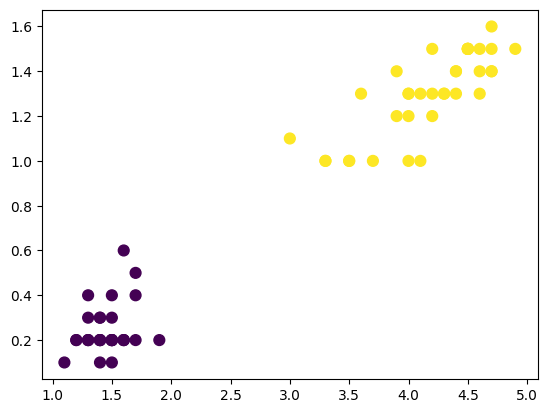

In [4]:
# Visualizando graficamente
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train,s=60)

plt.show()

- **Utilizando o SVC**
    - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [5]:
# Importando o SVC
from sklearn.svm import SVC

In [6]:
# Criando o classificador e já fazendo o fit com os dados
clf = SVC(kernel='linear').fit(X_train,y_train)

In [7]:
# Visualizando o coef
clf.coef_[0]

array([1.1769056 , 0.78337144])

In [8]:
# Separando w1
w1 = clf.coef_[0][0]

In [9]:
# e w2
w2 = clf.coef_[0][1]

In [10]:
# E agora utilizando o intercept_ como w0
w0 = clf.intercept_[0]

- Para traçar a reta, podemos considerar que a equação da reta será dada por:
    - y = ax + b
- Para considerar os dois coeficientes, também podemos escrever como:
    - w1.X_train[0] + w2.X_train[1] + w0 = 0
    - w1.X_train['petal width (cm)'] + w2.X_train['petal length (cm)'] + w0 = 0
    - Sendo x = X_train['petal width (cm)'] e y = X_train['petal length (cm)']:
        - w1.x + w2.y + w0 = 0
        - w2.y = -w1.x - w0
        - y = (-w1.x - w0)/w2

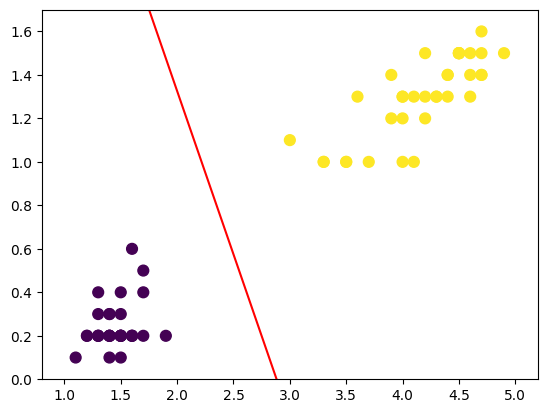

In [11]:
# Traçando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train,s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x,y,'r')

ax.set(ylim=(0,1.7))

plt.show()

In [12]:
# Além disso, também podemos ver quais foram os vetores de suporte utilizados para traçar essa reta
clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [13]:
# Pegando os valores de x
clf.support_vectors_[:,0]

array([1.9, 1.7, 3. ])

In [14]:
# E os valores de y
clf.support_vectors_[:,1]

array([0.2, 0.5, 1.1])

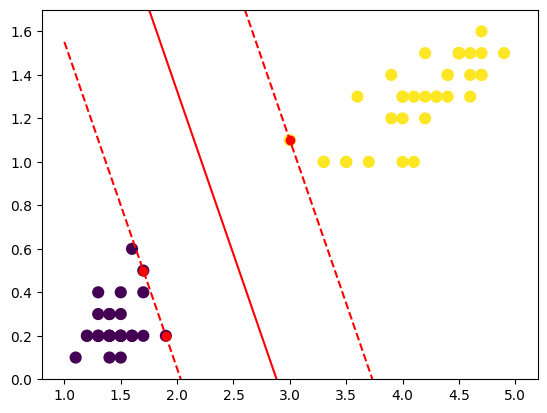

In [15]:
# Visualizando esses pontos
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train,s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x,y,'r')
y2 = (+1-w1*x-w0)/w2
ax.plot(x,y2,'--r')
y3 = (-1-w1*x-w0)/w2
ax.plot(x,y3,'--r')

ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],c='r')

ax.set(ylim=(0,1.7))

plt.show()

- **Agora podemos usar toda a nossa base de dados**

In [16]:
# Importando o dataset
X,y = load_iris(return_X_y = True, as_frame=True)

In [17]:
# Separando em treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [18]:
# Criando o classificador
clf2 = SVC().fit(X_train,y_train)

In [19]:
# Fazendo a previsão
y_pred = clf2.predict(X_test)

In [20]:
# E analisando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])